## Can I get data augmentation for free?

    Essentially keras come with free data augmentation tools built into its data  generator. The one problem is that it 

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import cv2
import pandas as pd
import random
import numpy as np
import sys
sys.path


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


['',
 '/home/ubuntu/src/cntk/bindings/python',
 '/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python36.zip',
 '/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6',
 '/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/lib-dynload',
 '/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages',
 '/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/extensions',
 '/home/ubuntu/.ipython']

In [199]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        samplewise_std_normalization=False,
        samplewise_center=True,
        rotation_range=90.,
        width_shift_range=0.1,
        height_shift_range=0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/data/sym_datasets/jpegs_256_1_train/',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        follow_links=True)


Found 10243 images belonging to 101 classes.


In [81]:
X, y = train_generator.next()

In [82]:
train_generator.class_indices


{'ApplyEyeMakeup': 0,
 'ApplyLipstick': 1,
 'Archery': 2,
 'BabyCrawling': 3,
 'BalanceBeam': 4,
 'BandMarching': 5,
 'BaseballPitch': 6,
 'Basketball': 7,
 'BasketballDunk': 8,
 'BenchPress': 9,
 'Biking': 10,
 'Billiards': 11,
 'BlowDryHair': 12,
 'BlowingCandles': 13,
 'BodyWeightSquats': 14,
 'Bowling': 15,
 'BoxingPunchingBag': 16,
 'BoxingSpeedBag': 17,
 'BreastStroke': 18,
 'BrushingTeeth': 19,
 'CleanAndJerk': 20,
 'CliffDiving': 21,
 'CricketBowling': 22,
 'CricketShot': 23,
 'CuttingInKitchen': 24,
 'Diving': 25,
 'Drumming': 26,
 'Fencing': 27,
 'FieldHockeyPenalty': 28,
 'FloorGymnastics': 29,
 'FrisbeeCatch': 30,
 'FrontCrawl': 31,
 'GolfSwing': 32,
 'Haircut': 33,
 'HammerThrow': 34,
 'Hammering': 35,
 'HandstandPushups': 36,
 'HandstandWalking': 37,
 'HeadMassage': 38,
 'HighJump': 39,
 'HorseRace': 40,
 'HorseRiding': 41,
 'HulaHoop': 42,
 'IceDancing': 43,
 'JavelinThrow': 44,
 'JugglingBalls': 45,
 'JumpRope': 46,
 'JumpingJack': 47,
 'Kayaking': 48,
 'Knitting': 49,


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


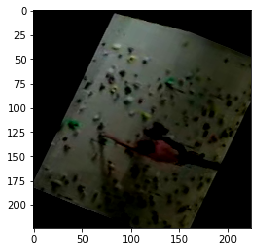

In [83]:
from matplotlib import pyplot as plt

plt.imshow(X[31])

In [84]:
y.shape


(32, 101)

In [8]:
import re 
import os
import csv
os.sep

'/'

In [9]:

def ucf101_sym_folder(data_dir, dest_dir):
    ''' creates sym linked directory for using image data generator on '''
    
    if not os.path.exists(dest):
        os.mkdir(dest_dir)
    # get name of all image directories
    directory_list = [name for name in os.listdir(data_dir) ]
    
    p = re.compile('v\_([a-zA-Z]*)\_g\w*_c0[1-2]')    

    directories = dict()
    
    # get unique class names and image directories that 
    # belong to the class
    for d in directory_list:
        f = p.match(d)
        if f:
            img_class = f[1]
            img_dir = f[0]
            if img_class not in directories:
                directories[img_class] = list()
            directories[img_class].append(img_dir)
    
    # create a directory for each class 
    for  img_class, folders in directories.items():
        symDir = dest + os.sep + img_class
        os.mkdir(symDir)
        for image_dir in folders:
            os.symlink(data_dir + os.sep + image_dir, \
                       symDir + os.sep + image_dir )          
    

In [197]:
data_dir = '/data/jpegs_256'
dest_dir = '/data/sym_datasets/jpegs_256_1_train'
test_dest_dir = '/data/sym_datasets/jpegs_256_1_test'
class_index_file = '/data/su_buildup/su_buildup/keras_data_generator/ucf101_splits/classInd.txt'
train_splits_file = '/data/su_buildup/su_buildup/keras_data_generator/ucf101_splits/trainlist01.txt'
test_splits_file = '/data/su_buildup/su_buildup/keras_data_generator/ucf101_splits/testlist01.txt'
n_frame = 1

In [50]:
# get name of all image directories
directory_list = [name for name in os.listdir(data_dir) ]

In [67]:
    
    p = re.compile('v\_([a-zA-Z]*)\_g\w*_c0[1-2]')    

    directories = dict()

In [68]:
for d in directory_list:
    f = p.match(d)
    if f:
        img_class = f[1]
        img_dir = f[0]
        if img_class not in directories:
            directories[img_class] = list()
        directories[img_class].append(img_dir)
            

In [69]:
directories

{'JavelinThrow': ['v_JavelinThrow_g05_c01',
  'v_JavelinThrow_g23_c01',
  'v_JavelinThrow_g25_c02',
  'v_JavelinThrow_g14_c02',
  'v_JavelinThrow_g12_c01',
  'v_JavelinThrow_g20_c01',
  'v_JavelinThrow_g22_c02',
  'v_JavelinThrow_g11_c01',
  'v_JavelinThrow_g04_c01',
  'v_JavelinThrow_g10_c01',
  'v_JavelinThrow_g13_c01',
  'v_JavelinThrow_g15_c01',
  'v_JavelinThrow_g05_c02',
  'v_JavelinThrow_g18_c01',
  'v_JavelinThrow_g04_c02',
  'v_JavelinThrow_g07_c02',
  'v_JavelinThrow_g21_c02',
  'v_JavelinThrow_g19_c02',
  'v_JavelinThrow_g16_c01',
  'v_JavelinThrow_g19_c01',
  'v_JavelinThrow_g13_c02',
  'v_JavelinThrow_g24_c01',
  'v_JavelinThrow_g06_c02',
  'v_JavelinThrow_g15_c02',
  'v_JavelinThrow_g25_c01',
  'v_JavelinThrow_g11_c02',
  'v_JavelinThrow_g20_c02',
  'v_JavelinThrow_g16_c02',
  'v_JavelinThrow_g01_c01',
  'v_JavelinThrow_g17_c01',
  'v_JavelinThrow_g23_c02',
  'v_JavelinThrow_g24_c02',
  'v_JavelinThrow_g02_c01',
  'v_JavelinThrow_g22_c01',
  'v_JavelinThrow_g08_c01',
  'v

In [79]:
    # create a directory for each class 
    for  img_class, folders in directories.items():
        symDir = dest + os.sep + img_class
        os.mkdir(symDir)
        for image_dir in folders:
            os.symlink(data_dir + os.sep + image_dir, \
                       symDir + os.sep + image_dir )   
        
        

## Using  training and test splits
    While that was great it gave us the whole data set to learn to, which while nice is probably a bit too much data to start 
    to see if the accuracy is approving. My reasoning being that classes become sparser per batch and thus the accuracy won't really improve appreciably under probably several epochs later (where an epoch takes hours!). Additionally last time I only took one random frame per image folder. What might be better is to take only 10 images per folder instead

In [2]:
training_file_split1 = '../keras_data_generator/ucf101_splits/trainlist01.txt'
test_file_split1 = ''

data_dir_root = '/data/jpegs_256'
# essentially go through split file
import csv 

# load Id list and labels 

train_list = list()

with open(training_file_split1, 'r') as f:
    reader = csv.reader(f)
    train_list = list(reader)
    
# now get folders

In [11]:
ucf101_sym_folder(data_dir, dest)

In [190]:
def ucf101_sym_folder_with_list(data_dir, dest_dir, img_folder_names, \
                                src_img_folders, n_frame):
    ''' creates sym linked directory for using image data generator on '''
    
    # make dest directory if it doesn't exist 
    if not os.path.exists(dest_dir):
        os.mkdir(dest_dir)
    
    # create sym links to n images in dest img folder  
    for img_folder in img_folder_names:
        dest_img_folder = dest_dir + os.sep + img_folder
        if not os.path.exists(dest_img_folder):
            os.mkdir(dest_img_folder)
        i = 1
        for src_img_folder in src_img_folders:
            if img_folder in src_img_folder:            
                src_img_dir = data_dir + os.sep + src_img_folder
                frames = [name for name in os.listdir(src_img_dir)]            
                random.shuffle(frames)
                n_random_frames = frames[:n_frame]
                for src_img in n_random_frames:
                    src_frame = src_img_dir + os.sep +  src_img
                    dest_frame = dest_img_folder +  os.sep +  'frame' + f'{i:06}' + '.jpg'
                    os.symlink(src_frame, dest_frame)
                    i = i + 1 

In [171]:
train_list = list()

with open(train_splits_file, 'r') as f:
    reader = csv.reader(f)
    train_list = list(reader)


src_img_folders = [label[0].split(' ')[0] for label in train_list ]
src_img_folders = [ src[0].split('/')[0] for src in scr_img_folders ]

src_img_folders[:3]


['v_ApplyEyeMakeup_g08_c01',
 'v_ApplyEyeMakeup_g08_c02',
 'v_ApplyEyeMakeup_g08_c03']

In [191]:
class_index_list = list()

with open(class_index_file, 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    class_index_list = list(reader)


img_folder_names = [label[1] for label in class_index_list ]
img_folder_names[:3]

['ApplyEyeMakeup', 'ApplyLipstick', 'Archery']

In [189]:
ucf101_sym_folder_with_list(data_dir, dest_dir, img_folder_names, src_img_folders, 1)

/data/jpegs_256/v_ApplyEyeMakeup_g08_c01/frame000120.jpg 1
/data/jpegs_256/v_ApplyEyeMakeup_g08_c02/frame000084.jpg 2
/data/jpegs_256/v_ApplyEyeMakeup_g08_c03/frame000032.jpg 3
/data/jpegs_256/v_ApplyEyeMakeup_g08_c04/frame000217.jpg 4
/data/jpegs_256/v_ApplyEyeMakeup_g08_c05/frame000260.jpg 5
/data/jpegs_256/v_ApplyEyeMakeup_g09_c01/frame000162.jpg 6
/data/jpegs_256/v_ApplyEyeMakeup_g09_c02/frame000101.jpg 7
/data/jpegs_256/v_ApplyEyeMakeup_g09_c03/frame000067.jpg 8
/data/jpegs_256/v_ApplyEyeMakeup_g09_c04/frame000175.jpg 9
/data/jpegs_256/v_ApplyEyeMakeup_g09_c05/frame000007.jpg 10
/data/jpegs_256/v_ApplyEyeMakeup_g09_c06/frame000173.jpg 11
/data/jpegs_256/v_ApplyEyeMakeup_g09_c07/frame000004.jpg 12
/data/jpegs_256/v_ApplyEyeMakeup_g10_c01/frame000058.jpg 13
/data/jpegs_256/v_ApplyEyeMakeup_g10_c02/frame000042.jpg 14
/data/jpegs_256/v_ApplyEyeMakeup_g10_c03/frame000049.jpg 15
/data/jpegs_256/v_ApplyEyeMakeup_g10_c04/frame000115.jpg 16
/data/jpegs_256/v_ApplyEyeMakeup_g10_c05/frame000

/data/jpegs_256/v_BalanceBeam_g21_c04/frame000102.jpg 59
/data/jpegs_256/v_BalanceBeam_g21_c05/frame000020.jpg 60
/data/jpegs_256/v_BalanceBeam_g22_c01/frame000032.jpg 61
/data/jpegs_256/v_BalanceBeam_g22_c02/frame000023.jpg 62
/data/jpegs_256/v_BalanceBeam_g22_c03/frame000067.jpg 63
/data/jpegs_256/v_BalanceBeam_g22_c04/frame000027.jpg 64
/data/jpegs_256/v_BalanceBeam_g23_c01/frame000099.jpg 65
/data/jpegs_256/v_BalanceBeam_g23_c02/frame000050.jpg 66
/data/jpegs_256/v_BalanceBeam_g23_c03/frame000044.jpg 67
/data/jpegs_256/v_BalanceBeam_g23_c04/frame000012.jpg 68
/data/jpegs_256/v_BalanceBeam_g23_c05/frame000062.jpg 69
/data/jpegs_256/v_BalanceBeam_g24_c01/frame000051.jpg 70
/data/jpegs_256/v_BalanceBeam_g24_c02/frame000079.jpg 71
/data/jpegs_256/v_BalanceBeam_g24_c03/frame000088.jpg 72
/data/jpegs_256/v_BalanceBeam_g24_c04/frame000061.jpg 73
/data/jpegs_256/v_BalanceBeam_g25_c01/frame000044.jpg 74
/data/jpegs_256/v_BalanceBeam_g25_c02/frame000012.jpg 75
/data/jpegs_256/v_BalanceBeam_g

/data/jpegs_256/v_BasketballDunk_g15_c03/frame000085.jpg 39
/data/jpegs_256/v_BasketballDunk_g15_c04/frame000009.jpg 40
/data/jpegs_256/v_BasketballDunk_g15_c05/frame000076.jpg 41
/data/jpegs_256/v_BasketballDunk_g15_c06/frame000033.jpg 42
/data/jpegs_256/v_BasketballDunk_g15_c07/frame000045.jpg 43
/data/jpegs_256/v_BasketballDunk_g16_c01/frame000029.jpg 44
/data/jpegs_256/v_BasketballDunk_g16_c02/frame000069.jpg 45
/data/jpegs_256/v_BasketballDunk_g16_c03/frame000031.jpg 46
/data/jpegs_256/v_BasketballDunk_g16_c04/frame000039.jpg 47
/data/jpegs_256/v_BasketballDunk_g16_c05/frame000008.jpg 48
/data/jpegs_256/v_BasketballDunk_g16_c06/frame000071.jpg 49
/data/jpegs_256/v_BasketballDunk_g17_c01/frame000022.jpg 50
/data/jpegs_256/v_BasketballDunk_g17_c02/frame000020.jpg 51
/data/jpegs_256/v_BasketballDunk_g17_c03/frame000046.jpg 52
/data/jpegs_256/v_BasketballDunk_g17_c04/frame000031.jpg 53
/data/jpegs_256/v_BasketballDunk_g17_c05/frame000042.jpg 54
/data/jpegs_256/v_BasketballDunk_g17_c06

/data/jpegs_256/v_BlowDryHair_g14_c01/frame000193.jpg 36
/data/jpegs_256/v_BlowDryHair_g14_c02/frame000228.jpg 37
/data/jpegs_256/v_BlowDryHair_g14_c03/frame000191.jpg 38
/data/jpegs_256/v_BlowDryHair_g14_c04/frame000111.jpg 39
/data/jpegs_256/v_BlowDryHair_g14_c05/frame000137.jpg 40
/data/jpegs_256/v_BlowDryHair_g15_c01/frame000046.jpg 41
/data/jpegs_256/v_BlowDryHair_g15_c02/frame000006.jpg 42
/data/jpegs_256/v_BlowDryHair_g15_c03/frame000057.jpg 43
/data/jpegs_256/v_BlowDryHair_g15_c04/frame000063.jpg 44
/data/jpegs_256/v_BlowDryHair_g15_c05/frame000060.jpg 45
/data/jpegs_256/v_BlowDryHair_g16_c01/frame000099.jpg 46
/data/jpegs_256/v_BlowDryHair_g16_c02/frame000097.jpg 47
/data/jpegs_256/v_BlowDryHair_g16_c03/frame000095.jpg 48
/data/jpegs_256/v_BlowDryHair_g16_c04/frame000025.jpg 49
/data/jpegs_256/v_BlowDryHair_g17_c01/frame000086.jpg 50
/data/jpegs_256/v_BlowDryHair_g17_c02/frame000071.jpg 51
/data/jpegs_256/v_BlowDryHair_g17_c03/frame000023.jpg 52
/data/jpegs_256/v_BlowDryHair_g

/data/jpegs_256/v_BoxingPunchingBag_g17_c01/frame000017.jpg 56
/data/jpegs_256/v_BoxingPunchingBag_g17_c02/frame000059.jpg 57
/data/jpegs_256/v_BoxingPunchingBag_g17_c03/frame000037.jpg 58
/data/jpegs_256/v_BoxingPunchingBag_g17_c04/frame000185.jpg 59
/data/jpegs_256/v_BoxingPunchingBag_g18_c01/frame000105.jpg 60
/data/jpegs_256/v_BoxingPunchingBag_g18_c02/frame000004.jpg 61
/data/jpegs_256/v_BoxingPunchingBag_g18_c03/frame000023.jpg 62
/data/jpegs_256/v_BoxingPunchingBag_g18_c04/frame000073.jpg 63
/data/jpegs_256/v_BoxingPunchingBag_g18_c05/frame000083.jpg 64
/data/jpegs_256/v_BoxingPunchingBag_g18_c06/frame000093.jpg 65
/data/jpegs_256/v_BoxingPunchingBag_g19_c01/frame000037.jpg 66
/data/jpegs_256/v_BoxingPunchingBag_g19_c02/frame000076.jpg 67
/data/jpegs_256/v_BoxingPunchingBag_g19_c03/frame000062.jpg 68
/data/jpegs_256/v_BoxingPunchingBag_g19_c04/frame000105.jpg 69
/data/jpegs_256/v_BoxingPunchingBag_g19_c05/frame000089.jpg 70
/data/jpegs_256/v_BoxingPunchingBag_g19_c06/frame000051

/data/jpegs_256/v_CliffDiving_g09_c04/frame000052.jpg 8
/data/jpegs_256/v_CliffDiving_g09_c05/frame000002.jpg 9
/data/jpegs_256/v_CliffDiving_g09_c06/frame000075.jpg 10
/data/jpegs_256/v_CliffDiving_g10_c01/frame000020.jpg 11
/data/jpegs_256/v_CliffDiving_g10_c02/frame000029.jpg 12
/data/jpegs_256/v_CliffDiving_g10_c03/frame000077.jpg 13
/data/jpegs_256/v_CliffDiving_g10_c04/frame000076.jpg 14
/data/jpegs_256/v_CliffDiving_g10_c05/frame000004.jpg 15
/data/jpegs_256/v_CliffDiving_g10_c06/frame000032.jpg 16
/data/jpegs_256/v_CliffDiving_g10_c07/frame000067.jpg 17
/data/jpegs_256/v_CliffDiving_g11_c01/frame000064.jpg 18
/data/jpegs_256/v_CliffDiving_g11_c02/frame000081.jpg 19
/data/jpegs_256/v_CliffDiving_g11_c03/frame000034.jpg 20
/data/jpegs_256/v_CliffDiving_g11_c04/frame000072.jpg 21
/data/jpegs_256/v_CliffDiving_g11_c05/frame000019.jpg 22
/data/jpegs_256/v_CliffDiving_g11_c06/frame000031.jpg 23
/data/jpegs_256/v_CliffDiving_g12_c01/frame000068.jpg 24
/data/jpegs_256/v_CliffDiving_g12

/data/jpegs_256/v_Diving_g12_c02/frame000106.jpg 127
/data/jpegs_256/v_Diving_g12_c03/frame000121.jpg 128
/data/jpegs_256/v_Diving_g12_c04/frame000009.jpg 129
/data/jpegs_256/v_Diving_g12_c05/frame000251.jpg 130
/data/jpegs_256/v_Diving_g12_c06/frame000185.jpg 131
/data/jpegs_256/v_Diving_g12_c07/frame000147.jpg 132
/data/jpegs_256/v_Diving_g13_c01/frame000129.jpg 133
/data/jpegs_256/v_Diving_g13_c02/frame000062.jpg 134
/data/jpegs_256/v_Diving_g13_c03/frame000134.jpg 135
/data/jpegs_256/v_Diving_g13_c04/frame000035.jpg 136
/data/jpegs_256/v_Diving_g13_c05/frame000160.jpg 137
/data/jpegs_256/v_Diving_g13_c06/frame000077.jpg 138
/data/jpegs_256/v_Diving_g13_c07/frame000061.jpg 139
/data/jpegs_256/v_Diving_g14_c01/frame000158.jpg 140
/data/jpegs_256/v_Diving_g14_c02/frame000283.jpg 141
/data/jpegs_256/v_Diving_g14_c03/frame000022.jpg 142
/data/jpegs_256/v_Diving_g14_c04/frame000019.jpg 143
/data/jpegs_256/v_Diving_g15_c01/frame000005.jpg 144
/data/jpegs_256/v_Diving_g15_c02/frame000143.j

/data/jpegs_256/v_FieldHockeyPenalty_g19_c04/frame000071.jpg 59
/data/jpegs_256/v_FieldHockeyPenalty_g20_c01/frame000025.jpg 60
/data/jpegs_256/v_FieldHockeyPenalty_g20_c02/frame000085.jpg 61
/data/jpegs_256/v_FieldHockeyPenalty_g20_c03/frame000008.jpg 62
/data/jpegs_256/v_FieldHockeyPenalty_g20_c04/frame000009.jpg 63
/data/jpegs_256/v_FieldHockeyPenalty_g21_c01/frame000081.jpg 64
/data/jpegs_256/v_FieldHockeyPenalty_g21_c02/frame000017.jpg 65
/data/jpegs_256/v_FieldHockeyPenalty_g21_c03/frame000053.jpg 66
/data/jpegs_256/v_FieldHockeyPenalty_g21_c04/frame000046.jpg 67
/data/jpegs_256/v_FieldHockeyPenalty_g22_c01/frame000048.jpg 68
/data/jpegs_256/v_FieldHockeyPenalty_g22_c02/frame000040.jpg 69
/data/jpegs_256/v_FieldHockeyPenalty_g22_c03/frame000056.jpg 70
/data/jpegs_256/v_FieldHockeyPenalty_g22_c04/frame000079.jpg 71
/data/jpegs_256/v_FieldHockeyPenalty_g23_c01/frame000043.jpg 72
/data/jpegs_256/v_FieldHockeyPenalty_g23_c02/frame000005.jpg 73
/data/jpegs_256/v_FieldHockeyPenalty_g23

/data/jpegs_256/v_Haircut_g18_c03/frame000115.jpg 53
/data/jpegs_256/v_Haircut_g18_c04/frame000188.jpg 54
/data/jpegs_256/v_Haircut_g18_c05/frame000248.jpg 55
/data/jpegs_256/v_Haircut_g19_c01/frame000024.jpg 56
/data/jpegs_256/v_Haircut_g19_c02/frame000256.jpg 57
/data/jpegs_256/v_Haircut_g19_c03/frame000114.jpg 58
/data/jpegs_256/v_Haircut_g19_c04/frame000216.jpg 59
/data/jpegs_256/v_Haircut_g19_c05/frame000071.jpg 60
/data/jpegs_256/v_Haircut_g19_c06/frame000102.jpg 61
/data/jpegs_256/v_Haircut_g20_c01/frame000161.jpg 62
/data/jpegs_256/v_Haircut_g20_c02/frame000162.jpg 63
/data/jpegs_256/v_Haircut_g20_c03/frame000037.jpg 64
/data/jpegs_256/v_Haircut_g20_c04/frame000020.jpg 65
/data/jpegs_256/v_Haircut_g20_c05/frame000037.jpg 66
/data/jpegs_256/v_Haircut_g20_c06/frame000133.jpg 67
/data/jpegs_256/v_Haircut_g20_c07/frame000236.jpg 68
/data/jpegs_256/v_Haircut_g21_c01/frame000113.jpg 69
/data/jpegs_256/v_Haircut_g21_c02/frame000046.jpg 70
/data/jpegs_256/v_Haircut_g21_c03/frame000200.

/data/jpegs_256/v_HeadMassage_g11_c01/frame000007.jpg 16
/data/jpegs_256/v_HeadMassage_g11_c02/frame000062.jpg 17
/data/jpegs_256/v_HeadMassage_g11_c03/frame000077.jpg 18
/data/jpegs_256/v_HeadMassage_g11_c04/frame000101.jpg 19
/data/jpegs_256/v_HeadMassage_g11_c05/frame000061.jpg 20
/data/jpegs_256/v_HeadMassage_g11_c06/frame000004.jpg 21
/data/jpegs_256/v_HeadMassage_g11_c07/frame000053.jpg 22
/data/jpegs_256/v_HeadMassage_g12_c01/frame000102.jpg 23
/data/jpegs_256/v_HeadMassage_g12_c02/frame000053.jpg 24
/data/jpegs_256/v_HeadMassage_g12_c03/frame000026.jpg 25
/data/jpegs_256/v_HeadMassage_g12_c04/frame000148.jpg 26
/data/jpegs_256/v_HeadMassage_g12_c05/frame000111.jpg 27
/data/jpegs_256/v_HeadMassage_g12_c06/frame000156.jpg 28
/data/jpegs_256/v_HeadMassage_g12_c07/frame000184.jpg 29
/data/jpegs_256/v_HeadMassage_g13_c01/frame000086.jpg 30
/data/jpegs_256/v_HeadMassage_g13_c02/frame000017.jpg 31
/data/jpegs_256/v_HeadMassage_g13_c03/frame000033.jpg 32
/data/jpegs_256/v_HeadMassage_g

/data/jpegs_256/v_HulaHoop_g16_c05/frame000064.jpg 46
/data/jpegs_256/v_HulaHoop_g16_c06/frame000085.jpg 47
/data/jpegs_256/v_HulaHoop_g17_c01/frame000020.jpg 48
/data/jpegs_256/v_HulaHoop_g17_c02/frame000072.jpg 49
/data/jpegs_256/v_HulaHoop_g17_c03/frame000080.jpg 50
/data/jpegs_256/v_HulaHoop_g17_c04/frame000038.jpg 51
/data/jpegs_256/v_HulaHoop_g17_c05/frame000069.jpg 52
/data/jpegs_256/v_HulaHoop_g18_c01/frame000001.jpg 53
/data/jpegs_256/v_HulaHoop_g18_c02/frame000006.jpg 54
/data/jpegs_256/v_HulaHoop_g18_c03/frame000079.jpg 55
/data/jpegs_256/v_HulaHoop_g18_c04/frame000101.jpg 56
/data/jpegs_256/v_HulaHoop_g19_c01/frame000078.jpg 57
/data/jpegs_256/v_HulaHoop_g19_c02/frame000041.jpg 58
/data/jpegs_256/v_HulaHoop_g19_c03/frame000030.jpg 59
/data/jpegs_256/v_HulaHoop_g19_c04/frame000076.jpg 60
/data/jpegs_256/v_HulaHoop_g20_c01/frame000010.jpg 61
/data/jpegs_256/v_HulaHoop_g20_c02/frame000034.jpg 62
/data/jpegs_256/v_HulaHoop_g20_c03/frame000092.jpg 63
/data/jpegs_256/v_HulaHoop_g

/data/jpegs_256/v_JumpRope_g10_c03/frame000468.jpg 17
/data/jpegs_256/v_JumpRope_g10_c04/frame000402.jpg 18
/data/jpegs_256/v_JumpRope_g11_c01/frame000304.jpg 19
/data/jpegs_256/v_JumpRope_g11_c02/frame000044.jpg 20
/data/jpegs_256/v_JumpRope_g11_c03/frame000215.jpg 21
/data/jpegs_256/v_JumpRope_g11_c04/frame000498.jpg 22
/data/jpegs_256/v_JumpRope_g11_c05/frame000463.jpg 23
/data/jpegs_256/v_JumpRope_g11_c06/frame000281.jpg 24
/data/jpegs_256/v_JumpRope_g11_c07/frame000213.jpg 25
/data/jpegs_256/v_JumpRope_g12_c01/frame000082.jpg 26
/data/jpegs_256/v_JumpRope_g12_c02/frame000096.jpg 27
/data/jpegs_256/v_JumpRope_g12_c03/frame000250.jpg 28
/data/jpegs_256/v_JumpRope_g12_c04/frame000322.jpg 29
/data/jpegs_256/v_JumpRope_g12_c05/frame000124.jpg 30
/data/jpegs_256/v_JumpRope_g13_c01/frame000074.jpg 31
/data/jpegs_256/v_JumpRope_g13_c02/frame000068.jpg 32
/data/jpegs_256/v_JumpRope_g13_c03/frame000045.jpg 33
/data/jpegs_256/v_JumpRope_g13_c04/frame000069.jpg 34
/data/jpegs_256/v_JumpRope_g

/data/jpegs_256/v_LongJump_g25_c04/frame000027.jpg 92
/data/jpegs_256/v_Lunges_g08_c01/frame000057.jpg 1
/data/jpegs_256/v_Lunges_g08_c02/frame000164.jpg 2
/data/jpegs_256/v_Lunges_g08_c03/frame000043.jpg 3
/data/jpegs_256/v_Lunges_g08_c04/frame000129.jpg 4
/data/jpegs_256/v_Lunges_g09_c01/frame000133.jpg 5
/data/jpegs_256/v_Lunges_g09_c02/frame000027.jpg 6
/data/jpegs_256/v_Lunges_g09_c03/frame000204.jpg 7
/data/jpegs_256/v_Lunges_g09_c04/frame000009.jpg 8
/data/jpegs_256/v_Lunges_g10_c01/frame000015.jpg 9
/data/jpegs_256/v_Lunges_g10_c02/frame000212.jpg 10
/data/jpegs_256/v_Lunges_g10_c03/frame000078.jpg 11
/data/jpegs_256/v_Lunges_g10_c04/frame000132.jpg 12
/data/jpegs_256/v_Lunges_g10_c05/frame000179.jpg 13
/data/jpegs_256/v_Lunges_g10_c06/frame000155.jpg 14
/data/jpegs_256/v_Lunges_g11_c01/frame000247.jpg 15
/data/jpegs_256/v_Lunges_g11_c02/frame000065.jpg 16
/data/jpegs_256/v_Lunges_g11_c03/frame000132.jpg 17
/data/jpegs_256/v_Lunges_g11_c04/frame000035.jpg 18
/data/jpegs_256/v_L

/data/jpegs_256/v_Nunchucks_g23_c01/frame000183.jpg 82
/data/jpegs_256/v_Nunchucks_g23_c02/frame000013.jpg 83
/data/jpegs_256/v_Nunchucks_g23_c03/frame000199.jpg 84
/data/jpegs_256/v_Nunchucks_g23_c04/frame000061.jpg 85
/data/jpegs_256/v_Nunchucks_g23_c05/frame000151.jpg 86
/data/jpegs_256/v_Nunchucks_g24_c01/frame000102.jpg 87
/data/jpegs_256/v_Nunchucks_g24_c02/frame000141.jpg 88
/data/jpegs_256/v_Nunchucks_g24_c03/frame000010.jpg 89
/data/jpegs_256/v_Nunchucks_g24_c04/frame000084.jpg 90
/data/jpegs_256/v_Nunchucks_g24_c05/frame000201.jpg 91
/data/jpegs_256/v_Nunchucks_g25_c01/frame000115.jpg 92
/data/jpegs_256/v_Nunchucks_g25_c02/frame000005.jpg 93
/data/jpegs_256/v_Nunchucks_g25_c03/frame000052.jpg 94
/data/jpegs_256/v_Nunchucks_g25_c04/frame000146.jpg 95
/data/jpegs_256/v_Nunchucks_g25_c05/frame000170.jpg 96
/data/jpegs_256/v_Nunchucks_g25_c06/frame000071.jpg 97
/data/jpegs_256/v_ParallelBars_g08_c01/frame000054.jpg 1
/data/jpegs_256/v_ParallelBars_g08_c02/frame000036.jpg 2
/data/

/data/jpegs_256/v_PlayingDaf_g25_c04/frame000193.jpg 107
/data/jpegs_256/v_PlayingDaf_g25_c05/frame000184.jpg 108
/data/jpegs_256/v_PlayingDaf_g25_c06/frame000150.jpg 109
/data/jpegs_256/v_PlayingDaf_g25_c07/frame000255.jpg 110
/data/jpegs_256/v_PlayingDhol_g08_c01/frame000252.jpg 1
/data/jpegs_256/v_PlayingDhol_g08_c02/frame000165.jpg 2
/data/jpegs_256/v_PlayingDhol_g08_c03/frame000161.jpg 3
/data/jpegs_256/v_PlayingDhol_g08_c04/frame000001.jpg 4
/data/jpegs_256/v_PlayingDhol_g08_c05/frame000241.jpg 5
/data/jpegs_256/v_PlayingDhol_g08_c06/frame000110.jpg 6
/data/jpegs_256/v_PlayingDhol_g08_c07/frame000009.jpg 7
/data/jpegs_256/v_PlayingDhol_g09_c01/frame000101.jpg 8
/data/jpegs_256/v_PlayingDhol_g09_c02/frame000245.jpg 9
/data/jpegs_256/v_PlayingDhol_g09_c03/frame000195.jpg 10
/data/jpegs_256/v_PlayingDhol_g09_c04/frame000099.jpg 11
/data/jpegs_256/v_PlayingDhol_g09_c05/frame000067.jpg 12
/data/jpegs_256/v_PlayingDhol_g09_c06/frame000021.jpg 13
/data/jpegs_256/v_PlayingDhol_g09_c07/fr

/data/jpegs_256/v_PlayingPiano_g11_c04/frame000194.jpg 16
/data/jpegs_256/v_PlayingPiano_g12_c01/frame000074.jpg 17
/data/jpegs_256/v_PlayingPiano_g12_c02/frame000117.jpg 18
/data/jpegs_256/v_PlayingPiano_g12_c03/frame000103.jpg 19
/data/jpegs_256/v_PlayingPiano_g12_c04/frame000126.jpg 20
/data/jpegs_256/v_PlayingPiano_g13_c01/frame000206.jpg 21
/data/jpegs_256/v_PlayingPiano_g13_c02/frame000021.jpg 22
/data/jpegs_256/v_PlayingPiano_g13_c03/frame000158.jpg 23
/data/jpegs_256/v_PlayingPiano_g13_c04/frame000085.jpg 24
/data/jpegs_256/v_PlayingPiano_g14_c01/frame000014.jpg 25
/data/jpegs_256/v_PlayingPiano_g14_c02/frame000061.jpg 26
/data/jpegs_256/v_PlayingPiano_g14_c03/frame000207.jpg 27
/data/jpegs_256/v_PlayingPiano_g14_c04/frame000161.jpg 28
/data/jpegs_256/v_PlayingPiano_g15_c01/frame000217.jpg 29
/data/jpegs_256/v_PlayingPiano_g15_c02/frame000011.jpg 30
/data/jpegs_256/v_PlayingPiano_g15_c03/frame000085.jpg 31
/data/jpegs_256/v_PlayingPiano_g15_c04/frame000195.jpg 32
/data/jpegs_25

/data/jpegs_256/v_PoleVault_g14_c01/frame000036.jpg 33
/data/jpegs_256/v_PoleVault_g14_c02/frame000110.jpg 34
/data/jpegs_256/v_PoleVault_g14_c03/frame000130.jpg 35
/data/jpegs_256/v_PoleVault_g14_c04/frame000101.jpg 36
/data/jpegs_256/v_PoleVault_g14_c05/frame000188.jpg 37
/data/jpegs_256/v_PoleVault_g14_c06/frame000081.jpg 38
/data/jpegs_256/v_PoleVault_g14_c07/frame000068.jpg 39
/data/jpegs_256/v_PoleVault_g15_c01/frame000109.jpg 40
/data/jpegs_256/v_PoleVault_g15_c02/frame000193.jpg 41
/data/jpegs_256/v_PoleVault_g15_c03/frame000137.jpg 42
/data/jpegs_256/v_PoleVault_g15_c04/frame000075.jpg 43
/data/jpegs_256/v_PoleVault_g16_c01/frame000022.jpg 44
/data/jpegs_256/v_PoleVault_g16_c02/frame000096.jpg 45
/data/jpegs_256/v_PoleVault_g16_c03/frame000094.jpg 46
/data/jpegs_256/v_PoleVault_g16_c04/frame000111.jpg 47
/data/jpegs_256/v_PoleVault_g16_c05/frame000060.jpg 48
/data/jpegs_256/v_PoleVault_g16_c06/frame000123.jpg 49
/data/jpegs_256/v_PoleVault_g16_c07/frame000107.jpg 50
/data/jpeg

/data/jpegs_256/v_Punch_g15_c02/frame000209.jpg 164
/data/jpegs_256/v_Punch_g15_c03/frame000023.jpg 165
/data/jpegs_256/v_Punch_g15_c04/frame000223.jpg 166
/data/jpegs_256/v_Punch_g15_c05/frame000104.jpg 167
/data/jpegs_256/v_Punch_g15_c06/frame000120.jpg 168
/data/jpegs_256/v_Punch_g16_c01/frame000177.jpg 169
/data/jpegs_256/v_Punch_g16_c02/frame000157.jpg 170
/data/jpegs_256/v_Punch_g16_c03/frame000121.jpg 171
/data/jpegs_256/v_Punch_g16_c04/frame000143.jpg 172
/data/jpegs_256/v_Punch_g16_c05/frame000145.jpg 173
/data/jpegs_256/v_Punch_g16_c06/frame000130.jpg 174
/data/jpegs_256/v_Punch_g16_c07/frame000219.jpg 175
/data/jpegs_256/v_Punch_g17_c01/frame000030.jpg 176
/data/jpegs_256/v_Punch_g17_c02/frame000077.jpg 177
/data/jpegs_256/v_Punch_g17_c03/frame000005.jpg 178
/data/jpegs_256/v_Punch_g17_c04/frame000098.jpg 179
/data/jpegs_256/v_Punch_g17_c05/frame000274.jpg 180
/data/jpegs_256/v_Punch_g17_c06/frame000243.jpg 181
/data/jpegs_256/v_Punch_g17_c07/frame000076.jpg 182
/data/jpegs_

/data/jpegs_256/v_RopeClimbing_g21_c02/frame000139.jpg 66
/data/jpegs_256/v_RopeClimbing_g21_c03/frame000157.jpg 67
/data/jpegs_256/v_RopeClimbing_g21_c04/frame000090.jpg 68
/data/jpegs_256/v_RopeClimbing_g22_c01/frame000064.jpg 69
/data/jpegs_256/v_RopeClimbing_g22_c02/frame000093.jpg 70
/data/jpegs_256/v_RopeClimbing_g22_c03/frame000145.jpg 71
/data/jpegs_256/v_RopeClimbing_g22_c04/frame000085.jpg 72
/data/jpegs_256/v_RopeClimbing_g23_c01/frame000115.jpg 73
/data/jpegs_256/v_RopeClimbing_g23_c02/frame000041.jpg 74
/data/jpegs_256/v_RopeClimbing_g23_c03/frame000050.jpg 75
/data/jpegs_256/v_RopeClimbing_g23_c04/frame000052.jpg 76
/data/jpegs_256/v_RopeClimbing_g24_c01/frame000134.jpg 77
/data/jpegs_256/v_RopeClimbing_g24_c02/frame000104.jpg 78
/data/jpegs_256/v_RopeClimbing_g24_c03/frame000095.jpg 79
/data/jpegs_256/v_RopeClimbing_g24_c04/frame000156.jpg 80
/data/jpegs_256/v_RopeClimbing_g25_c01/frame000032.jpg 81
/data/jpegs_256/v_RopeClimbing_g25_c02/frame000116.jpg 82
/data/jpegs_25

/data/jpegs_256/v_Shotput_g19_c04/frame000069.jpg 69
/data/jpegs_256/v_Shotput_g20_c01/frame000044.jpg 70
/data/jpegs_256/v_Shotput_g20_c02/frame000055.jpg 71
/data/jpegs_256/v_Shotput_g20_c03/frame000002.jpg 72
/data/jpegs_256/v_Shotput_g20_c04/frame000107.jpg 73
/data/jpegs_256/v_Shotput_g21_c01/frame000051.jpg 74
/data/jpegs_256/v_Shotput_g21_c02/frame000013.jpg 75
/data/jpegs_256/v_Shotput_g21_c03/frame000078.jpg 76
/data/jpegs_256/v_Shotput_g21_c04/frame000055.jpg 77
/data/jpegs_256/v_Shotput_g22_c01/frame000042.jpg 78
/data/jpegs_256/v_Shotput_g22_c02/frame000060.jpg 79
/data/jpegs_256/v_Shotput_g22_c03/frame000043.jpg 80
/data/jpegs_256/v_Shotput_g22_c04/frame000016.jpg 81
/data/jpegs_256/v_Shotput_g22_c05/frame000061.jpg 82
/data/jpegs_256/v_Shotput_g23_c01/frame000017.jpg 83
/data/jpegs_256/v_Shotput_g23_c02/frame000004.jpg 84
/data/jpegs_256/v_Shotput_g23_c03/frame000088.jpg 85
/data/jpegs_256/v_Shotput_g23_c04/frame000045.jpg 86
/data/jpegs_256/v_Shotput_g23_c05/frame000041.

/data/jpegs_256/v_SoccerJuggling_g17_c04/frame000009.jpg 54
/data/jpegs_256/v_SoccerJuggling_g17_c05/frame000281.jpg 55
/data/jpegs_256/v_SoccerJuggling_g17_c06/frame000114.jpg 56
/data/jpegs_256/v_SoccerJuggling_g17_c07/frame000185.jpg 57
/data/jpegs_256/v_SoccerJuggling_g18_c01/frame000106.jpg 58
/data/jpegs_256/v_SoccerJuggling_g18_c02/frame000027.jpg 59
/data/jpegs_256/v_SoccerJuggling_g18_c03/frame000216.jpg 60
/data/jpegs_256/v_SoccerJuggling_g18_c04/frame000069.jpg 61
/data/jpegs_256/v_SoccerJuggling_g18_c05/frame000317.jpg 62
/data/jpegs_256/v_SoccerJuggling_g18_c06/frame000127.jpg 63
/data/jpegs_256/v_SoccerJuggling_g18_c07/frame000277.jpg 64
/data/jpegs_256/v_SoccerJuggling_g19_c01/frame000244.jpg 65
/data/jpegs_256/v_SoccerJuggling_g19_c02/frame000061.jpg 66
/data/jpegs_256/v_SoccerJuggling_g19_c03/frame000249.jpg 67
/data/jpegs_256/v_SoccerJuggling_g19_c04/frame000071.jpg 68
/data/jpegs_256/v_SoccerJuggling_g19_c05/frame000028.jpg 69
/data/jpegs_256/v_SoccerJuggling_g19_c06

/data/jpegs_256/v_GolfSwing_g13_c02/frame000165.jpg 27
/data/jpegs_256/v_GolfSwing_g13_c03/frame000017.jpg 28
/data/jpegs_256/v_GolfSwing_g13_c04/frame000179.jpg 29
/data/jpegs_256/v_GolfSwing_g14_c01/frame000103.jpg 30
/data/jpegs_256/v_GolfSwing_g14_c02/frame000142.jpg 31
/data/jpegs_256/v_GolfSwing_g14_c03/frame000061.jpg 32
/data/jpegs_256/v_GolfSwing_g14_c04/frame000010.jpg 33
/data/jpegs_256/v_GolfSwing_g15_c01/frame000046.jpg 34
/data/jpegs_256/v_GolfSwing_g15_c02/frame000242.jpg 35
/data/jpegs_256/v_GolfSwing_g15_c03/frame000139.jpg 36
/data/jpegs_256/v_GolfSwing_g15_c04/frame000039.jpg 37
/data/jpegs_256/v_GolfSwing_g16_c01/frame000093.jpg 38
/data/jpegs_256/v_GolfSwing_g16_c02/frame000028.jpg 39
/data/jpegs_256/v_GolfSwing_g16_c03/frame000031.jpg 40
/data/jpegs_256/v_GolfSwing_g16_c04/frame000016.jpg 41
/data/jpegs_256/v_GolfSwing_g17_c01/frame000014.jpg 42
/data/jpegs_256/v_GolfSwing_g17_c02/frame000008.jpg 43
/data/jpegs_256/v_GolfSwing_g17_c03/frame000059.jpg 44
/data/jpeg

/data/jpegs_256/v_TaiChi_g22_c02/frame000006.jpg 58
/data/jpegs_256/v_TaiChi_g22_c03/frame000124.jpg 59
/data/jpegs_256/v_TaiChi_g22_c04/frame000156.jpg 60
/data/jpegs_256/v_TaiChi_g23_c01/frame000180.jpg 61
/data/jpegs_256/v_TaiChi_g23_c02/frame000209.jpg 62
/data/jpegs_256/v_TaiChi_g23_c03/frame000222.jpg 63
/data/jpegs_256/v_TaiChi_g23_c04/frame000246.jpg 64
/data/jpegs_256/v_TaiChi_g24_c01/frame000103.jpg 65
/data/jpegs_256/v_TaiChi_g24_c02/frame000136.jpg 66
/data/jpegs_256/v_TaiChi_g24_c03/frame000101.jpg 67
/data/jpegs_256/v_TaiChi_g24_c04/frame000037.jpg 68
/data/jpegs_256/v_TaiChi_g25_c01/frame000105.jpg 69
/data/jpegs_256/v_TaiChi_g25_c02/frame000180.jpg 70
/data/jpegs_256/v_TaiChi_g25_c03/frame000078.jpg 71
/data/jpegs_256/v_TaiChi_g25_c04/frame000008.jpg 72
/data/jpegs_256/v_TennisSwing_g08_c01/frame000130.jpg 1
/data/jpegs_256/v_TennisSwing_g08_c02/frame000186.jpg 2
/data/jpegs_256/v_TennisSwing_g08_c03/frame000156.jpg 3
/data/jpegs_256/v_TennisSwing_g08_c04/frame000082.jp

/data/jpegs_256/v_UnevenBars_g16_c04/frame000281.jpg 39
/data/jpegs_256/v_UnevenBars_g16_c05/frame000008.jpg 40
/data/jpegs_256/v_UnevenBars_g17_c01/frame000019.jpg 41
/data/jpegs_256/v_UnevenBars_g17_c02/frame000065.jpg 42
/data/jpegs_256/v_UnevenBars_g17_c03/frame000001.jpg 43
/data/jpegs_256/v_UnevenBars_g17_c04/frame000040.jpg 44
/data/jpegs_256/v_UnevenBars_g18_c01/frame000106.jpg 45
/data/jpegs_256/v_UnevenBars_g18_c02/frame000125.jpg 46
/data/jpegs_256/v_UnevenBars_g18_c03/frame000057.jpg 47
/data/jpegs_256/v_UnevenBars_g18_c04/frame000027.jpg 48
/data/jpegs_256/v_UnevenBars_g19_c01/frame000064.jpg 49
/data/jpegs_256/v_UnevenBars_g19_c02/frame000012.jpg 50
/data/jpegs_256/v_UnevenBars_g19_c03/frame000026.jpg 51
/data/jpegs_256/v_UnevenBars_g19_c04/frame000016.jpg 52
/data/jpegs_256/v_UnevenBars_g20_c01/frame000111.jpg 53
/data/jpegs_256/v_UnevenBars_g20_c02/frame000091.jpg 54
/data/jpegs_256/v_UnevenBars_g20_c03/frame000029.jpg 55
/data/jpegs_256/v_UnevenBars_g20_c04/frame000046

/data/jpegs_256/v_YoYo_g16_c05/frame000130.jpg 44
/data/jpegs_256/v_YoYo_g16_c06/frame000130.jpg 45
/data/jpegs_256/v_YoYo_g17_c01/frame000167.jpg 46
/data/jpegs_256/v_YoYo_g17_c02/frame000068.jpg 47
/data/jpegs_256/v_YoYo_g17_c03/frame000024.jpg 48
/data/jpegs_256/v_YoYo_g17_c04/frame000066.jpg 49
/data/jpegs_256/v_YoYo_g17_c05/frame000175.jpg 50
/data/jpegs_256/v_YoYo_g17_c06/frame000046.jpg 51
/data/jpegs_256/v_YoYo_g18_c01/frame000075.jpg 52
/data/jpegs_256/v_YoYo_g18_c02/frame000150.jpg 53
/data/jpegs_256/v_YoYo_g18_c03/frame000144.jpg 54
/data/jpegs_256/v_YoYo_g18_c04/frame000050.jpg 55
/data/jpegs_256/v_YoYo_g19_c01/frame000010.jpg 56
/data/jpegs_256/v_YoYo_g19_c02/frame000034.jpg 57
/data/jpegs_256/v_YoYo_g19_c03/frame000052.jpg 58
/data/jpegs_256/v_YoYo_g19_c04/frame000003.jpg 59
/data/jpegs_256/v_YoYo_g19_c05/frame000123.jpg 60
/data/jpegs_256/v_YoYo_g19_c06/frame000086.jpg 61
/data/jpegs_256/v_YoYo_g20_c01/frame000004.jpg 62
/data/jpegs_256/v_YoYo_g20_c02/frame000031.jpg 63


In [196]:
test_list = list()

with open(test_splits_file, 'r') as f:
    reader = csv.reader(f)
    test_list = list(reader)


src_img_folders = [ src[0].split('/')[0] for src in scr_img_folders ]
src_img_folders[:3]

['v_ApplyEyeMakeup_g08_c01',
 'v_ApplyEyeMakeup_g08_c02',
 'v_ApplyEyeMakeup_g08_c03']

In [198]:
ucf101_sym_folder_with_list(data_dir, test_dest_dir, img_folder_names, src_img_folders, 1)